In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score

In [3]:
df = pd.read_csv("E:/accident_severity_analytics/data/processed/Cleaned_US_Accidents.csv", parse_dates=["Start_Time", "End_Time", "Weather_Timestamp"])
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident,state route 32,...,False,False,False,True,False,Night,Night,Day,Day,30.000000
1,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident,i-75,...,False,False,False,False,False,Night,Day,Day,Day,30.000000
2,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident,miamisburg centerville road,...,False,False,False,True,False,Day,Day,Day,Day,30.000000
3,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident,westerville road,...,False,False,False,False,False,Day,Day,Day,Day,30.000000
4,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident,woodward avenue,...,False,False,False,False,False,Day,Day,Day,Day,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335823,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,Accident,pomona fwy,...,False,False,False,False,False,Day,Day,Day,Day,28.600000
6335824,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,Accident,i-8,...,False,False,False,False,False,Day,Day,Day,Day,26.883333
6335825,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,Accident,garden grove fwy,...,False,False,False,False,False,Day,Day,Day,Day,28.466667
6335826,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,Accident,san diego fwy,...,False,False,False,False,False,Day,Day,Day,Day,29.350000


Drop irrelevant columns

In [4]:
drop_cols = ['ID', 'Source', 'Start_Time', 'End_Time', 'Weather_Timestamp', 
             'Description', 'Street', 'Zipcode', 'Country']
df.drop(columns=drop_cols, inplace=True)


Encode categorical columns

In [5]:
cat_cols = df.select_dtypes(include='object').columns

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le 

Split data

In [6]:
X = df.drop('Severity', axis=1)
y = df['Severity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Apply SMOTE

In [ ]:
smote = SMOTE(random_state=42, sampling_strategy='not majority')  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    

Train LightGBM

In [9]:
model = lgb.LGBMClassifier(
    objective='multiclass',        
    num_class=4,                    
    class_weight='balanced',         #  يساعد في عدم التوازن
    learning_rate=0.05,              #  معدل تعلم هادي
    num_leaves=31,
    max_depth=10,
    subsample=0.8,                   #  less overfitting
    colsample_bytree=0.8,            #  less overfitting
    random_state=42,
    n_estimators=300
)
model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.678138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3050
[LightGBM] [Info] Number of data points in the train set: 15886672, number of used features: 31
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, max_depth=10, n_estimators=300, num_class=4,
               objective='multiclass', random_state=42, subsample=0.8)

Evaluation

In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100  

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy:.2f}%")
print(f"F1 Score (Weighted): {f1:.2f}%")

Confusion Matrix:
[[  7762   4576    781     39]
 [ 35665 846390  75723  35140]
 [  6503  89530 122290  10997]
 [   391  15765   1493  14121]]

Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.59      0.24     13158
           2       0.89      0.85      0.87    992918
           3       0.61      0.53      0.57    229320
           4       0.23      0.44      0.31     31770

    accuracy                           0.78   1267166
   macro avg       0.47      0.61      0.50   1267166
weighted avg       0.81      0.78      0.79   1267166


Accuracy: 78.17%
F1 Score (Weighted): 79.38%


In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances_percent = 100 * feature_importances / feature_importances.sum()

top_features = feature_importances_percent.sort_values(ascending=False).head(15)

for feature, importance in top_features.items():
    print(f"{feature:<25}: {importance:.2f}%")


Duration                 : 14.26%
Start_Lat                : 11.24%
Start_Lng                : 10.80%
Wind_Speed(mph)          : 9.39%
State                    : 6.69%
Distance(mi)             : 6.67%
County                   : 5.59%
Weather_Condition        : 5.51%
Temperature(F)           : 5.14%
Pressure(in)             : 4.71%
Humidity(%)              : 4.14%
Visibility(mi)           : 3.35%
City                     : 2.96%
Wind_Direction           : 1.62%
Timezone                 : 1.42%


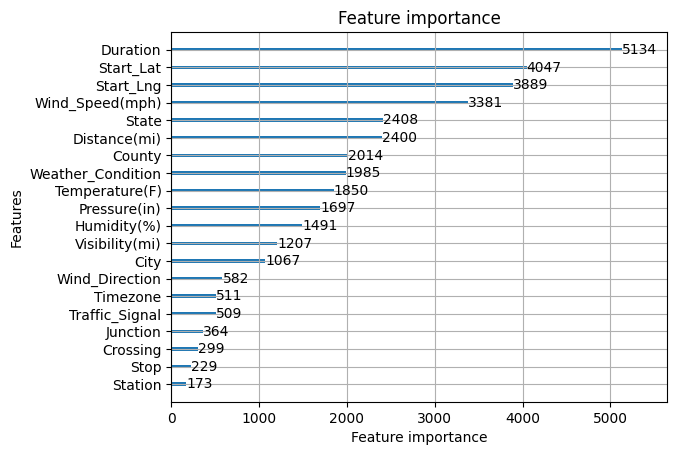

In [12]:
import matplotlib.pyplot as plt
lgb.plot_importance(model, max_num_features=20)
plt.show()